### Table of Contents
- **IRIS zadatak**
- [1. Loading dataset and libraries](#loading)
- [2. Preprocessing](#preprocessing)
    - [2.1 Rename columns](#rename-columns)
    - [2.2 Data types](#data-types)
    - [2.3 Missing values](#missing-values)
    - [2.4 Duplicated data](#duplicated-data)
- [3. Statistical description](#statistical)
    - [3.1 Description](#description)
- [4. Models - tunning hyperparameters](#models)
    - [4.1 Standardization and splitting](#standardization)
    - [4.2 Batch size and epochs](#batch)
    - [4.3 Optimization algorithms](#opt-algos)
        - [4.3.1 Adam](#adam)
        - [4.3.2 Stochastic gradient descent(SGD)](#sgd)
    - [4.4 Neuron Activation Function](#activation)
    - [4.5 Dropout regularization](#dropout)
    - [4.6 Number of units and hidden layers](#hidden)
    - [4.7 Custom loss function](#custom)
- [5. Conclusion](#conclusion)
- **Energy eff zadatak**
- [6.1 Model](#model-1)
- [6.2 Batch and epoch](#model-2)
- [6.3 Adam - Learning rate optimization](#model-3)
- [6.4 Activation functions](#model-4)
- [6.5 Dropout rate and weight](#model-5)
- [6.6 Units increase](#model-6)

## 1. Loading dataset and libraries <a name="loading" />

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from numpy import absolute
import math
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.python.ops import math_ops
from tensorflow.keras import backend as K

df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

## 2. Preprocessing <a name="preprocessing"/>

### 2.1 Rename columns  <a name="rename-columns"/>

In [5]:
df.columns = ['id', 
              'sepal_length', 
              'sepal_width', 
              'petal_length', 
              'petal_width',
            'species']
df.head(20)

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### 2.2 Data types  <a name="data-types"/>

In [6]:
df.dtypes

id                int64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### 2.3 Missing values  <a name="missing-values"/>

In [7]:
df.isnull().any()

id              False
sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [8]:
df.drop('id', axis=1, inplace=True)

### 2.4 Duplicated data  <a name="duplicated-data"/>

In [9]:
duplicates = df.duplicated().sum()
print(duplicates)
df = df.drop_duplicates()
duplicates = df.duplicated().sum()
print(duplicates)

3
0


## 3. Statistical Description  <a name="statistical"/>

### 3.1 Description <a name="description"/>

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Models - tunning hyperparameters <a name="models"/>

NAPOMENA: Svi hiperparametri su ispitani pojedinacno. Idealno bi bilo da se napravi grid za sve njih odjednom sa velikim brojem razlicitih parametara, ali bi to znacilo i veliki broj modela za treniranje. Kako bih skratio vreme, odabrao sam da ovako jedan po jedan ispitujem, iako to verovatno znaci i manje uspesnosti. Ideja je da se prikaze koji se parametar kako menja i gde.

### 4.1 Standardization and splitting <a name="standardization"/>

In [12]:
X = df[[    
    'sepal_length', 
    'sepal_width', 
    'petal_length', 
    'petal_width', 

]]
y = df[['species']]

In [13]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

Podelicemo data set u odnosu 80/20. 80% za treniranje, i 20% za testiranje.

In [14]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2 Batch size and epochs <a name="batch"/>

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. A sample is a single row of data.\
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.\
One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. \

Sada mozemo uraditi grid za razlicite batch size i epoch size. Dakle isprobacemo 4x4 = 16 modela.

In [14]:
batch_size_list=[5, 10, 15, 20]
epoch_list = [10, 50, 100, 200]

best_batch_size = 0
best_epoch_size = 0
best_test_acc = 0
#conf = ""

for batch_trial in batch_size_list:
    for epoch_trial in epoch_list:
        model = Sequential()
        model.add(Dense(units=10, input_dim=4, activation='relu'))
        model.add(Dense(3,activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=batch_trial, epochs=epoch_trial)
        _, train_acc = model.evaluate(X_train, y_train, verbose=0)
        _, test_acc = model.evaluate(X_test, y_test, verbose=0)

        if test_acc > best_test_acc:
            best_test_acc = test_acc
            #conf = "Best batch size: {}; Best epoch size: {};".format(batch_trial, epoch_trial)
            best_batch_size = batch_trial
            best_epoch_size = epoch_trial
            
print("best_batch_size: {}".format(best_batch_size))
print("best_epoch_size: {}".format(best_epoch_size))
print("Best test accuracy: {}".format(best_test_acc))

best_batch_size: 5
best_epoch_size: 200
Best test accuracy: 0.9666666388511658


Najbolji accuracy je dao model sa batch 5 i epoch 200. Sada mozemo izbuci ovaj model i prikazati loss i accuracy kroz epoche.

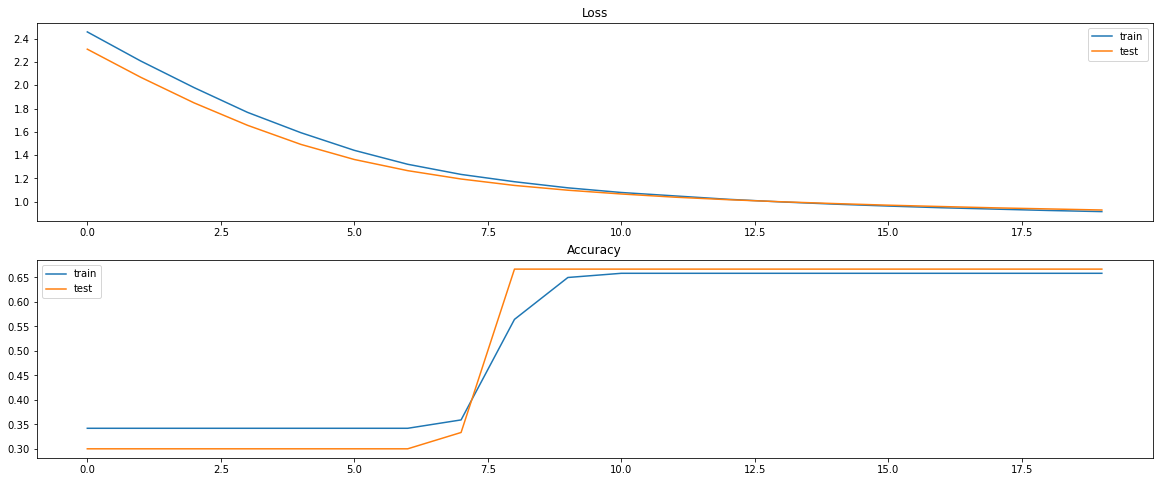

In [15]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=20)
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

plt.rcParams["figure.figsize"] = (20,8)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### 4.3 Optimization algorithms <a name="opt-algos"/>

Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible. In deep learning, we have the concept of loss, which tells us how poorly the model is performing at that current instant. Now we need to use this loss to train our network such that it performs better. Essentially what we need to do is to take the loss and try to minimize it, because a lower loss means our model is going to perform better. The process of minimizing (or maximizing) any mathematical expression is called optimization.

Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the function.

### 4.3.1 Adam <a name="adam"/>

**Adam (Adaptive moment estimation)** \

Adam (name derived from Adaptive Moment Estimation) is a machine learning algorithm for first-order gradient-based optimization that computes adaptive learning rates for each parameter.

Adam combines the advantages of two other gradient-based algorithms that maintain per-parameter learning rates, Adagrad and RMSprop with Momentum.
Adagrad works well for sparse gradients by scaling the learning rate for each parameter according to the history of gradients from previous iterations.

In RMSprop, the learning rate is adapted using the moving average of the squared gradient for each weight, making it useful for mini-batch learning in on-line settings.
There are a few small but important differences between Adam and the algorithms it is based on.

Adam differs from RMSprop with momentum in 2 ways:

1. RMSprop with momentum generates its parameter updates using a momentum on the rescaled gradient, whereas Adam updates parameters with direct estimates using a running average of first and second moment of the gradient.
2. Adam has a bias-correction term and RMSprop does not.

Adam works in 5 steps:
1. Compute the gradient and its element-wise square using the current parameters.
2. Update the exponential moving average of the 1st-order moment and the 2nd-order moment.
3. Compute an unbiased average of the 1st-order moment and 2nd-order moment.
4. Compute weight update: 1st-order moment unbiased average divided by the square root of 2nd-order moment unbiased average (and scale by learning rate).
5. Apply update to the weights.

Some advantages of Adam include: \
Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum)\
Usually works well even with little tuning of hyperparameters.

In [16]:
learn_rate_list = [0.001, 0.01, 0.1]

best_test_acc = 0
best_learn_rate = 0

for learn_rate_trial in learn_rate_list:

        model = Sequential()
        model.add(Dense(units=10, input_dim=4, activation='relu'))
        model.add(Dense(3,activation='softmax'))

        optimizer = Adam(lr=learn_rate_trial)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
        _, train_acc = model.evaluate(X_train, y_train, verbose=0)
        _, test_acc = model.evaluate(X_test, y_test, verbose=0)

        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_learn_rate = learn_rate_trial

print("best_learn_rate: {}".format(best_learn_rate))
print("Best test accuracy: {}".format(best_test_acc))

best_learn_rate: 0.001
Best test accuracy: 0.9333333373069763


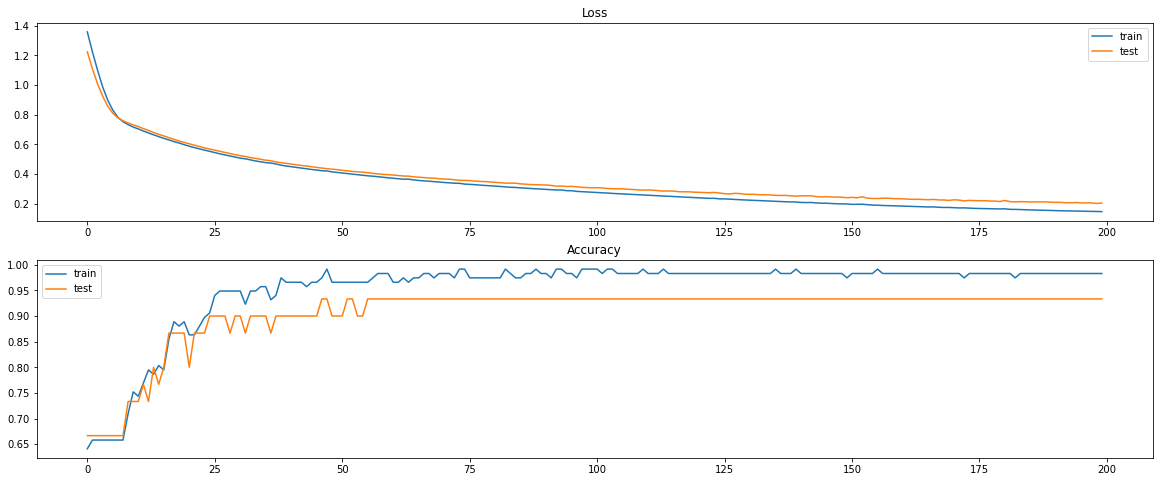

In [17]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(3,activation='softmax'))
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

plt.rcParams["figure.figsize"] = (20,8)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### 4.3.2 Stochastic gradient descent(SGD) <a name="sgd"/>

**Stochastic gradient descent(SGD)**

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

Strictly speaking, SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model. 

The word ‘stochastic‘ means a system or a process that is linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration.

In [18]:
learn_rate_list = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum_list = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

best_test_acc = 0
best_learn_rate = 0
best_momentum = 0

for learn_rate_trial in learn_rate_list:
    for momentum_trial in momentum_list:

        model = Sequential()
        model.add(Dense(units=10, input_dim=4, activation='relu'))
        model.add(Dense(3,activation='softmax'))

        optimizer = SGD(lr=learn_rate_trial, momentum=momentum_trial)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
        _, train_acc = model.evaluate(X_train, y_train, verbose=0)
        _, test_acc = model.evaluate(X_test, y_test, verbose=0)

        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_learn_rate = learn_rate_trial

print("best_learn_rate: {}".format(best_learn_rate))
print("best_momentum: {}".format(best_momentum))
print("Best test accuracy: {}".format(best_test_acc))

best_learn_rate: 0.001
best_momentum: 0
Best test accuracy: 0.9666666388511658


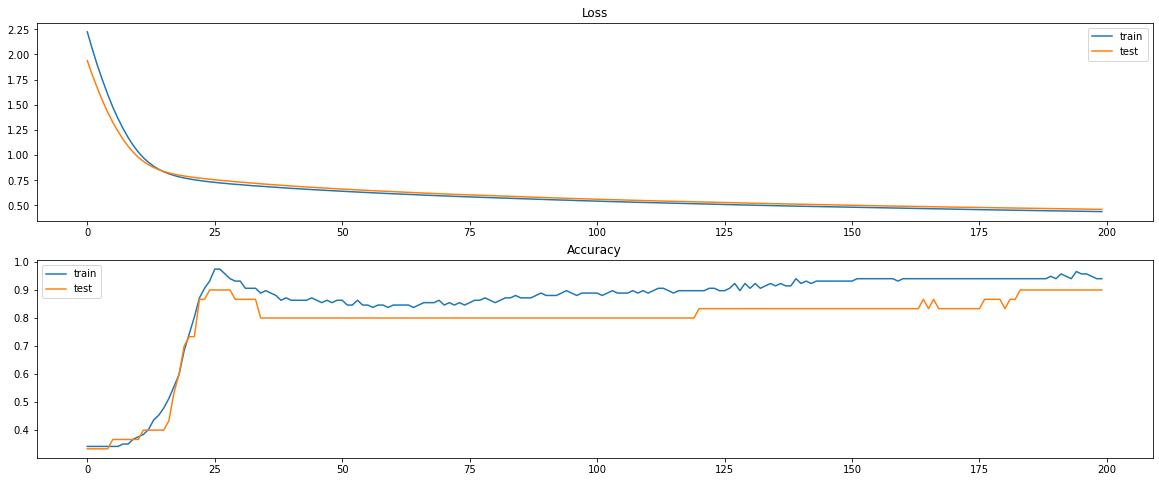

In [19]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(3,activation='softmax'))
optimizer = SGD(lr=0.001, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

plt.rcParams["figure.figsize"] = (20,8)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## 4.4 Neuron Activation Function <a name="activation"/> 

**ReLU**

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

**Sigmoid**

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. A common example of a sigmoid function is the logistic function.

**Tanh**

The hyperbolic tangent activation function is also referred to simply as the Tanh (also “tanh” and “TanH“) function. It is very similar to the sigmoid activation function and even has the same S-shape. The function takes any real value as input and outputs values in the range -1 to 1.

Some popular functions:


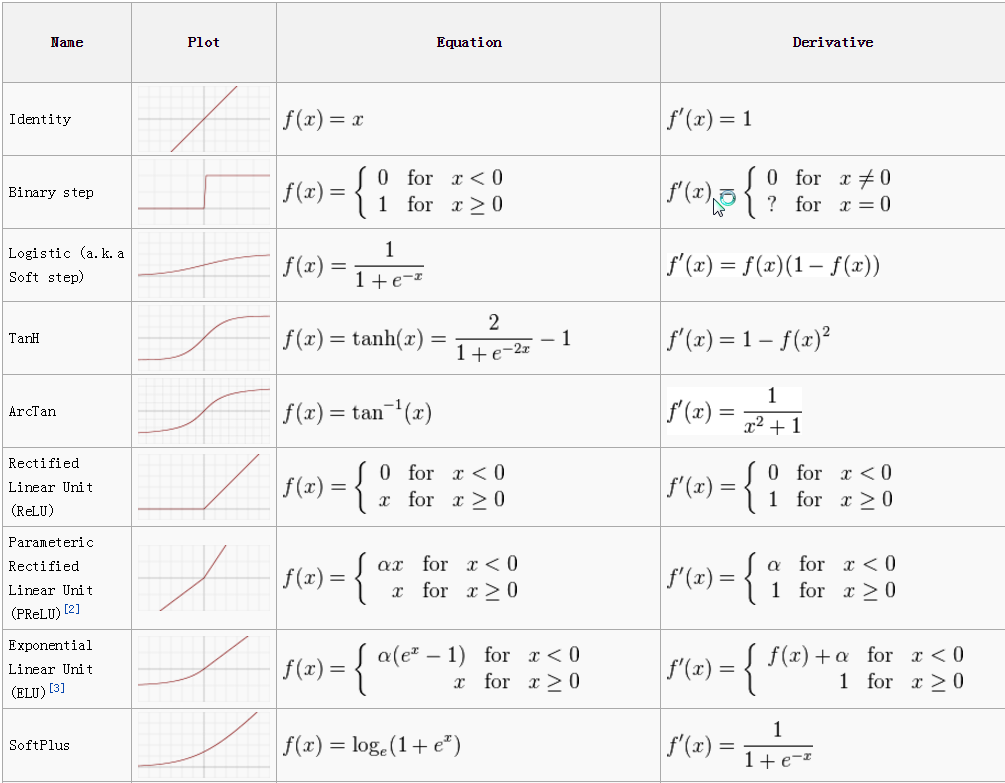

In [20]:
activation_list = ['relu', 'sigmoid', 'tanh']

best_test_acc = 0
best_activation = ""

for activation_trial in activation_list:

        model = Sequential()
        model.add(Dense(units=10, input_dim=4, activation=activation_trial))
        model.add(Dense(3,activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
        _, train_acc = model.evaluate(X_train, y_train, verbose=0)
        _, test_acc = model.evaluate(X_test, y_test, verbose=0)

        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_activation = activation_trial

print("best_activation: {}".format(best_activation))
print("Best test accuracy: {}".format(best_test_acc))

best_activation: sigmoid
Best test accuracy: 0.9666666388511658


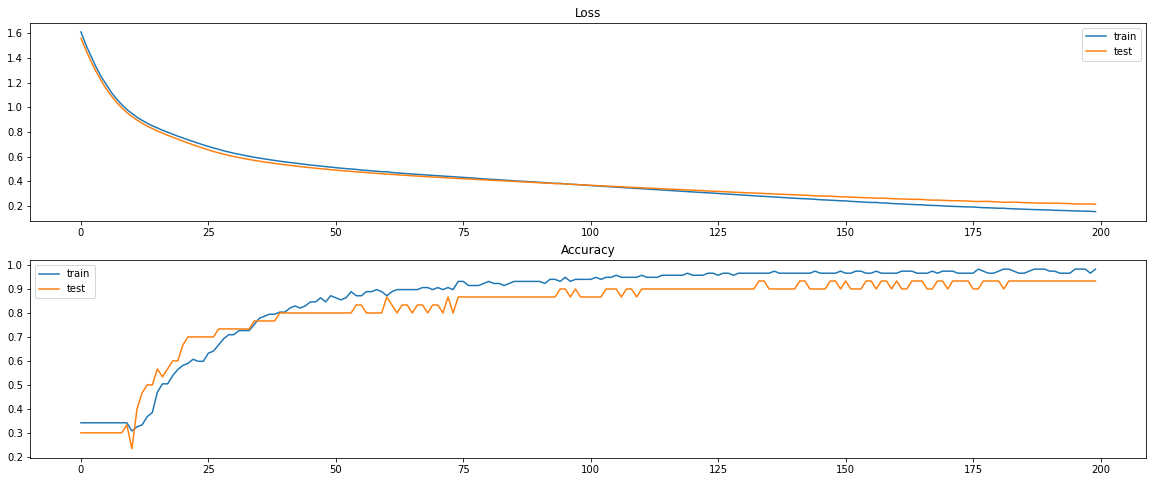

In [21]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='tanh'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

plt.rcParams["figure.figsize"] = (20,8)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### 4.5 Dropout regularization <a name="dropout"/>

Large neural nets trained on relatively small datasets can overfit the training data.

This has the effect of the model learning the statistical noise in the training data, which results in poor performance when the model is evaluated on new data, e.g. a test dataset. Generalization error increases due to overfitting.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

In [22]:
weight_constraint = [1, 3]
dropout_rate = [0.0, 0.1, 0.2,]

best_dropout_rate = 0
best_weight_constraint = 0
best_test_acc = 0

for weight_constraint_trial in weight_constraint:
    for dropout_rate_trial in dropout_rate:

        model = Sequential()
        model.add(Dense(units=10, input_dim=4, activation='relu', kernel_constraint=max_norm(weight_constraint_trial)))
        model.add(Dropout(dropout_rate_trial))
        model.add(Dense(3,activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
        _, train_acc = model.evaluate(X_train, y_train, verbose=0)
        _, test_acc = model.evaluate(X_test, y_test, verbose=0)

        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_dropout_rate = dropout_rate_trial
            best_weight_constraint = weight_constraint_trial

print("best_dropout_rate: {}".format(best_dropout_rate))
print("best_weight_constraint: {}".format(best_weight_constraint))
print("Best test accuracy: {}".format(best_test_acc))

best_dropout_rate: 0.2
best_weight_constraint: 3
Best test accuracy: 0.9666666388511658


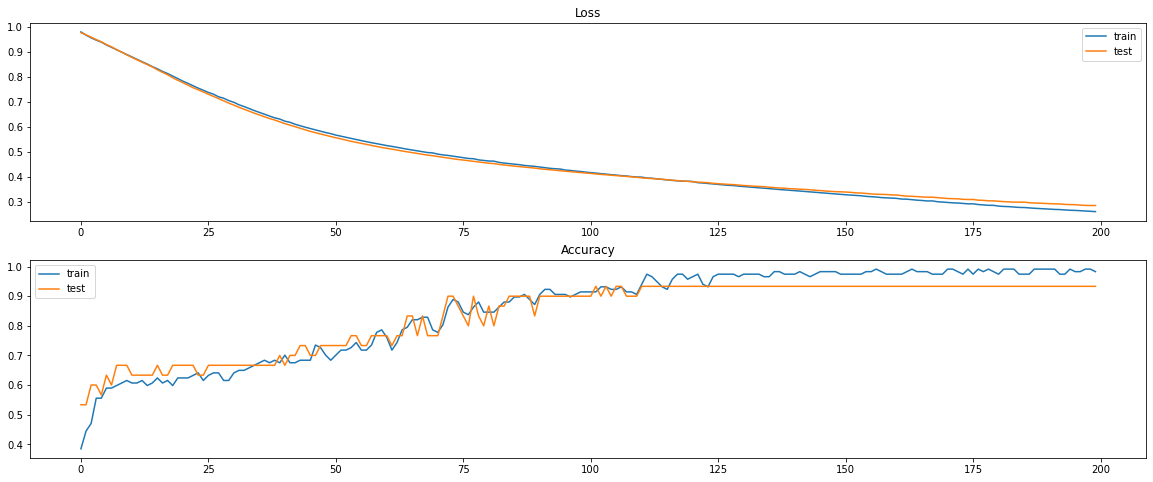

In [23]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu', kernel_constraint=max_norm(1)))
model.add(Dropout(0.0))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

plt.rcParams["figure.figsize"] = (20,8)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### 4.6 Number of units and hidden layers <a name="hidden"/>

A single-layer neural network can only be used to represent linearly separable functions. This means very simple problems where, say, the two classes in a classification problem can be neatly separated by a line. If your problem is relatively simple, perhaps a single layer network would be sufficient.

Most problems that we are interested in solving are not linearly separable.

A Multilayer Perceptron can be used to represent convex regions. This means that in effect, they can learn to draw shapes around examples in some high-dimensional space that can separate and classify them, overcoming the limitation of linear separability.

In fact, there is a theoretical finding by Lippmann in the 1987 paper “An introduction to computing with neural nets” that shows that an MLP with two hidden layers is sufficient for creating classification regions of any desired shape. This is instructive, although it should be noted that no indication of how many nodes to use in each layer or how to learn the weights is given.

A further theoretical finding and proof has shown that MLPs are universal approximators. That with one hidden layer, an MLP can approximate any function that we require.

In [31]:
hidden_list = [0, 1, 2, 4]
units_per_layer = [8, 10, 32, 100]

best_hidden = 0
best_units = 0
best_test_acc = 0

for hidden_trial in hidden_list:
    for units_per_layer_trial in units_per_layer:
        model = Sequential()
        model.add(Dense(units=units_per_layer_trial, input_dim=4, activation='relu'))
        for i in range(0, hidden_trial):
            model.add(Dense(units=units_per_layer_trial, activation='relu'))        
        model.add(Dense(3,activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
        _, train_acc = model.evaluate(X_train, y_train, verbose=0)
        _, test_acc = model.evaluate(X_test, y_test, verbose=0)
        
        print("Number of hidden layers: {}; Number of units per layer: {}; Train acc: {}; Test acc: {}".format(hidden_trial, units_per_layer_trial, train_acc, test_acc))

        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_hidden = hidden_trial
            best_units = units_per_layer_trial

print("best_hidden: {}".format(best_hidden))
print("best_units: {}".format(best_units))
print("Best test accuracy: {}".format(best_test_acc))

Number of hidden layers: 0; Number of units per layer: 8; Train acc: 0.9914529919624329; Test acc: 0.9333333373069763
Number of hidden layers: 0; Number of units per layer: 10; Train acc: 0.9829059839248657; Test acc: 0.9333333373069763
Number of hidden layers: 0; Number of units per layer: 32; Train acc: 0.9743589758872986; Test acc: 0.9666666388511658
Number of hidden layers: 0; Number of units per layer: 100; Train acc: 0.9829059839248657; Test acc: 0.9333333373069763
Number of hidden layers: 1; Number of units per layer: 8; Train acc: 0.9829059839248657; Test acc: 0.9333333373069763
Number of hidden layers: 1; Number of units per layer: 10; Train acc: 0.9829059839248657; Test acc: 0.9333333373069763
Number of hidden layers: 1; Number of units per layer: 32; Train acc: 0.9829059839248657; Test acc: 0.9666666388511658
Number of hidden layers: 1; Number of units per layer: 100; Train acc: 0.9914529919624329; Test acc: 0.9666666388511658
Number of hidden layers: 2; Number of units per 

### 4.7 Custom loss function <a name="custom"/>

ML je ogromna oblast. Kao sto znamo, potrebno je domensko znanje, kako bi modeli bili najbolji moguci. Samim tim, moze se desiti da ponekad u arsenalu dostupnih loss funkcija nedostaje loss funkcija koja bas nama treba, nesto posebno sto bi zadovoljilo nase potrebe. U ovakim slucajevima, moguce je koristiti callback funckije.

To znaci da se prilikom kompajliranja modela za loss funkciju ne navode neke standardne (cross entropy, mse itd.) vec se navede funkcija koju sami implementiramo. Poziva se bez argumenata.

U primeru ispod je neki imaginarni slucaj gde se radi kvadratno rastojanje izmedju stvarnih i predicted vrednosti, zatim se izracuna srednja vrednost, i konacno se loss dobije tako sto se podeli sa 10 i doda vrednost neke konstante.

Dalje, prilikom treniranja, mozemo videti vrednosti koje loss funkcija generise tokom prolaska kroz epoche.

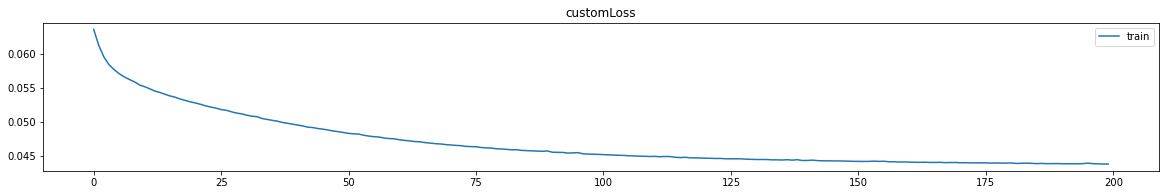

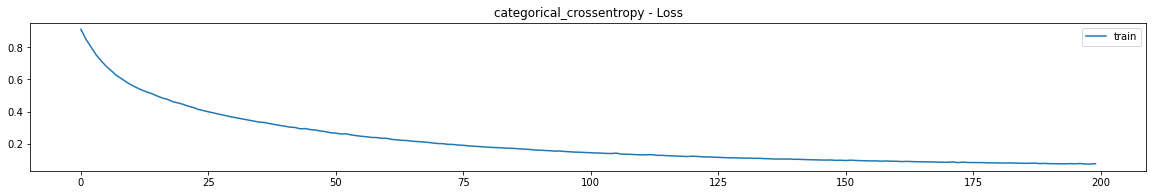

In [31]:
def customLoss(y_true, y_pred):
    diff = math_ops.squared_difference(y_pred, y_true)
    loss = K.mean(diff, axis=-1)
    const = 0.042424242
    loss = (loss / 10.0) + const
    return loss

model = Sequential()
model.add(Dense(units=32, input_dim=4, activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss=customLoss, optimizer='adam')
history = model.fit(X_train, y_train, verbose=0, batch_size=15, epochs=200)
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)

plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(211)
plt.title('customLoss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

#####
model = Sequential()
model.add(Dense(units=32, input_dim=4, activation='relu')) 
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, batch_size=15, epochs=200)
train_acc = model.evaluate(X_train, y_train, verbose=0)
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(211)
plt.title('categorical_crossentropy - Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

### 5. Conclusion <a name="conclusion"/>

U ovom zadatku prikazani su osnovni nacini optimizacije i implementacije neuronskih mreza. Vrlo cesto se za pocetak uzima neka arhitektura po intuiciji, dok za neke postoje i nepisana pravila. Ovde smo isprobali vise kombinacija razlicitih hyperparametara. Vrednosti koje se dobijaju su oko 96% (accuracy). 

# Energy eff zadatak 

Sto se zadatka za energy efficiency tice, ovde se radi o regresiji. Jedna target vrednost na osnovu 8 featura. Ono sto je zanimljivo je to da se prilikom koriscenja KerasRegressor() i GridSearchCV() dobijaju negativne vrednosti za best score.

In [3]:
df = pd.read_csv("en_eff.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.shape

(768, 10)

In [5]:
df.columns = ['relative_compactness', 
              'surface_area', 
              'wall_area', 
              'roof_area', 
              'overall_height', 
              'orientation', 
              'glazing_area', 
              'glazing_distribution', 
              'heating_load', 
              'cooling_load']
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
df.dtypes

relative_compactness    float64
surface_area            float64
wall_area               float64
roof_area               float64
overall_height          float64
orientation               int64
glazing_area            float64
glazing_distribution      int64
heating_load            float64
cooling_load            float64
dtype: object

In [7]:
df.isnull().any()

relative_compactness    False
surface_area            False
wall_area               False
roof_area               False
overall_height          False
orientation             False
glazing_area            False
glazing_distribution    False
heating_load            False
cooling_load            False
dtype: bool

In [8]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [9]:
X = df[[    
    'relative_compactness', 
    'surface_area', 
    'wall_area', 
    'roof_area', 
    'overall_height', 
    'orientation', 
    'glazing_area',
    'glazing_distribution'
]]
y = df[['heating_load']]

In [10]:
predictorScalerFit=StandardScaler().fit(X)
targetVarScalerFit=StandardScaler().fit(y)

X=predictorScalerFit.transform(X)
y=targetVarScalerFit.transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
def base_model_one():
    model = Sequential()
    model.add(Dense(units=10, input_dim=8, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=10, activation='relu'))

    model.add(Dense(units=1, kernel_initializer='normal'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

model = KerasRegressor(build_fn=base_model_one, verbose=1)
param_grid={
    'batch_size':[5, 10, 15],
    'nb_epoch':[10, 50, 100]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
print("Best: {}, using {}.".format(grid_result.best_score_, grid_result.best_params_))

154/154 [==============================] - 0s 2ms/step - loss: 0.5678 - mse: 0.5678
Best: -0.5642288525899252, using {'batch_size': 5, 'nb_epoch': 100}.


Ovde sam dobio negativnu vrednost za best score. Ovo je bilo cudno, pa sam zato na kraju promenio data set. Prestao sam da koristim KerasRegressor i GridSearchCV jer sumnjam da je los data set za ovo. Menjao sam broj hidden layera, broj neurona, batch size i epoch size i za sve vrednosti je negativan best score.

### 6.1 Model <a name="model-1"/>

Posto cemo ostatak uraditi "rucno" mozemo za pocetak da isprobamo jedan model nasumicno, po intuiciji. Metrika za evaluaciju u preostalim modelima ce nam biti MAE. Mean Square Error.

In [69]:
def base_model():
    model = Sequential()
    model.add(Dense(units=20, input_dim=8, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    return model

model = base_model()
history = model.fit(X_train, y_train, epochs=100, batch_size= 10, verbose=0)
predictions = model.predict(X_test)
print("Evaluation: ", model.evaluate(X_test, y_test))

8/8 [==============================] - 0s 4ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0722
Evaluation:  [0.009148885495960712, 0.009148885495960712, 0.07215996086597443]


dict_keys(['loss', 'mse', 'mae'])


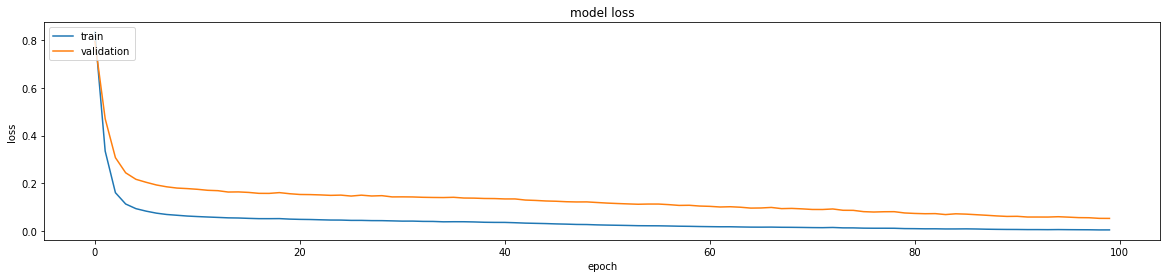

In [70]:
print(history.history.keys())
plt.rcParams["figure.figsize"] = (20,4)
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Vidimo da i za test i za train grafik ima slicno ponasanje tokom prolaska kroz epohe.

In [71]:
predictions = model.predict(X_test)
error = mean_absolute_error(y_test, predictions)
print('MAE: %.3f' % error)

MAE: 0.072


### 6.2 Batch and epoch <a name="model-2"/>

In [73]:
batch_size_list=[5, 10, 15, 20]
epoch_list = [10, 50, 100, 200]

best_batch_size = 0
best_epoch_size = 0
lowest_mae = 1000

for batch_trial in batch_size_list:
    for epoch_trial in epoch_list:
        model = Sequential()
        model.add(Dense(units=10, input_dim=8, activation='relu'))
        model.add(Dense(units=1, activation='linear'))
        model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

        history = model.fit(X_train, y_train, epochs=epoch_trial, batch_size=batch_trial, verbose=0)
        predictions = model.predict(X_test)
        
        predictions = model.predict(X_test)
        error = mean_absolute_error(y_test, predictions)
        print('MAE: %.3f' % error)

        if error < lowest_mae:
            lowest_mae = error
            best_batch_size = batch_trial
            best_epoch_size = epoch_trial
            
print("best_batch_size: {}".format(best_batch_size))
print("best_epoch_size: {}".format(best_epoch_size))
print("lowest_mae: {}".format(lowest_mae))

MAE: 0.195
MAE: 0.160
MAE: 0.132
MAE: 0.051
MAE: 0.252
MAE: 0.187
MAE: 0.119
MAE: 0.154
MAE: 0.239
MAE: 0.198
MAE: 0.197
MAE: 0.142
MAE: 0.382
MAE: 0.206
MAE: 0.180
MAE: 0.137
best_batch_size: 5
best_epoch_size: 200
lowest_mae: 0.05078052351560027


## 6.3 Adam - Learning rate optimization  <a name="model-3"/>

In [78]:
learn_rate_list = [0.001, 0.01, 0.1]

best_learn_rate = 0
lowest_mae = 1000

for learn_rate_trial in learn_rate_list:
    model = Sequential()
    model.add(Dense(units=10, input_dim=8, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    optimizer = Adam(lr=learn_rate_trial)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])

    history = model.fit(X_train, y_train, epochs=200, batch_size=5, verbose=0)
    predictions = model.predict(X_test)

    predictions = model.predict(X_test)
    error = mean_absolute_error(y_test, predictions)
    print('MAE: %.5f' % error)

    if error < lowest_mae:
        lowest_mae = error
        best_learn_rate = learn_rate_trial
            
print("best_learn_rate: {}".format(best_learn_rate))
print("lowest_mae: {}".format(lowest_mae))

MAE: 0.06243
MAE: 0.05859
MAE: 0.33820
best_learn_rate: 0.01
lowest_mae: 0.05858954768381196


## 6.4 Activation functions  <a name="model-4"/>

In [84]:
first_activation_list = ['relu', 'sigmoid', 'tanh', 'linear']
second_activation_list = ['relu', 'sigmoid', 'tanh', 'linear']

best_first_activation = ""
best_second_activation = ""
lowest_mae = 1000

for first_trial in first_activation_list:
    for second_trial in second_activation_list:
        model = Sequential()
        model.add(Dense(units=10, input_dim=8, activation=first_trial))
        model.add(Dense(units=1, activation=second_trial))
        optimizer = Adam(lr=0.01)
        model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])

        history = model.fit(X_train, y_train, epochs=200, batch_size=5, verbose=0)
        predictions = model.predict(X_test)

        predictions = model.predict(X_test)
        error = mean_absolute_error(y_test, predictions)
        print('MAE: %.5f' % error)

        if error < lowest_mae:
            lowest_mae = error
            best_first_activation = first_trial
            best_second_activation = second_trial
            
print("best_first_activation: {}".format(best_first_activation))
print("best_second_activation: {}".format(best_second_activation))

print("lowest_mae: {}".format(lowest_mae))

MAE: 0.46858
MAE: 0.53568
MAE: 0.19643
MAE: 0.06362
MAE: 0.45057
MAE: 0.52948
MAE: 0.15651
MAE: 0.05352
MAE: 0.44909
MAE: 0.53363
MAE: 0.15561
MAE: 0.04803
MAE: 0.55842
MAE: 0.58130
MAE: 0.24810
MAE: 0.23571
best_first_activation: tanh
best_second_activation: linear
lowest_mae: 0.04803075999998327


## 6.5 Dropout rate and weight  <a name="model-5"/>

In [85]:
weight_constraint = [1, 3]
dropout_rate = [0.0, 0.1, 0.2,]

best_dropout_rate = 0
best_weight_constraint = 0
lowest_mae = 1000

for weight_constraint_trial in weight_constraint:
    for dropout_rate_trial in dropout_rate:
        model = Sequential()
        model.add(Dense(units=10, input_dim=8, activation='tanh', kernel_constraint=max_norm(weight_constraint_trial)))
        model.add(Dropout(dropout_rate_trial))
        model.add(Dense(units=1, activation='linear'))
        optimizer = Adam(lr=0.01)
        model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])

        history = model.fit(X_train, y_train, epochs=200, batch_size=5, verbose=0)
        predictions = model.predict(X_test)

        predictions = model.predict(X_test)
        error = mean_absolute_error(y_test, predictions)
        print('MAE: %.5f' % error)

        if error < lowest_mae:
            lowest_mae = error
            best_dropout_rate = dropout_rate_trial
            best_weight_constraint = weight_constraint_trial
            
print("best_dropout_rate: {}".format(best_dropout_rate))
print("best_weight_constraint: {}".format(best_weight_constraint))
print("lowest_mae: {}".format(lowest_mae))

MAE: 0.14498
MAE: 0.19637
MAE: 0.22650
MAE: 0.08155
MAE: 0.15988
MAE: 0.16843
best_dropout_rate: 0.0
best_weight_constraint: 3
lowest_mae: 0.08155163481099502


## 6.6 Units increase  <a name="model-6"/>

In [92]:
model = Sequential()
model.add(Dense(units=10, input_dim=8, activation='tanh'))
model.add(Dense(units=100, activation='linear'))
model.add(Dense(units=1, activation='linear'))
optimizer = Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])

history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
predictions = model.predict(X_test)

predictions = model.predict(X_test)
error = mean_absolute_error(y_test, predictions)
print('MAE: %.5f' % error)

MAE: 0.04210


Na kraju, moze se dodati jos layera ili neurona. Medjutim, uz sve ovo nisam naisao na vrednosti manje od 0.04 MAE.

Generalni zakljucak o ovim data setovima, i zadacima, je da je Adam bio najbolji optimizer uz learning rate 0.01. Vrednosti za epoch su bile najbolje za vece vrednosti, oko 200+, dok za epoch size je bio najbolji rezultat 5-10. Sto se aktivacionih funkcija tice, tu je raspored ispao bitan, odnosno to da je prvi layer sa aktivacionom funkcijom tanh, dok je sledeci layer sa linear funkcijom. Za sve je pracen MAE.